## CONVOLUTIONAL NEURAL NETWORK APPLICATION

## Table of Contents

1. [1st part: classify MNIST using a simple model](#part1)
2. [2nd part: Deep Learning applied on MNIST](#part2)

In [1]:
import tensorflow as tf
from IPython.display import Markdown, display

[5 0 4 1 9]


<div id='part1'/>
## 1st part: classify MNIST using a simple model 

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# normalize
x_train, x_test = x_train / 255.0, x_test / 255.0
print(y_train[0:5])

In [2]:
print("categorical labels")
print(y_train[0:5])

# make labels one hot encoded
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

print("one hot encoded labels")
print(y_train[0:5])

categorical labels
[5 0 4 1 9]
one hot encoded labels
tf.Tensor(
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]], shape=(5, 10), dtype=float32)


In [3]:
print("number of training examples:" , x_train.shape[0])
print("number of test examples:" , x_test.shape[0])

number of training examples: 60000
number of test examples: 10000


In [4]:
train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(50)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(50)

### Converting a 2D Image into a 1D Vector

In [5]:
from tensorflow.keras.layers import Flatten
flatten = Flatten(dtype='float32')

"original data shape"
print(x_train.shape)

"flattened shape"
print(flatten(x_train).shape)

(60000, 28, 28)
(60000, 784)


In [6]:
# Weight tensor
W = tf.Variable(tf.zeros([784, 10], tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10], tf.float32))

In [7]:
def forward(x):
    return tf.matmul(x,W) + b

### Softmax Regression

In [8]:
# a sample softmax calculation on an input vector
vector = [10, 0.2, 8]
softmax = tf.nn.softmax(vector)
print("softmax calculation")
print(softmax.numpy())
print("verifying normalization")
print(tf.reduce_sum(softmax))
print("finding vector with largest value (label assignment)")
print("category", tf.argmax(softmax).numpy())

softmax calculation
[8.8075405e-01 4.8839214e-05 1.1919710e-01]
verifying normalization
tf.Tensor(1.0, shape=(), dtype=float32)
finding vector with largest value (label assignment)
category 0


In [9]:
def activate(x):
    return tf.nn.softmax(forward(x))

In [10]:
def model(x):
    x = flatten(x)
    return activate(x)

### Cost function

In [11]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))
# addition of 1e-10 to prevent errors in zero calculations

# current loss function for unoptimized model
cross_entropy(y_train, model(x_train)).numpy()

138155.11

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.25)

In [13]:
def train_step(x, y ):
    with tf.GradientTape() as tape:
        #compute loss function
        current_loss = cross_entropy( y, model(x))
        # compute gradient of loss 
        #(This is automatic! Even with specialized funcctions!)
        grads = tape.gradient( current_loss , [W,b] )
        # Apply SGD step to our Variables W and b
        optimizer.apply_gradients( zip( grads , [W,b] ) )     
    return current_loss.numpy()

### Training batches

In [14]:
# zeroing out weights in case you want to run this cell multiple times
# Weight tensor
W = tf.Variable(tf.zeros([784, 10],tf.float32))
# Bias tensor
b = tf.Variable(tf.zeros([10],tf.float32))

loss_values=[]
accuracies = []
epochs = 10

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%500==0: #reporting intermittent batch statistics
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss) ) 
    
    # collecting statistics at each epoch...loss function and accuracy
    #  loss function
    current_loss = cross_entropy( y_train, model( x_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(model(x_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) ) 

epoch  0 batch 500 loss: 180.23135
epoch  0 batch 1000 loss: 194.27525
end of epoch  0 loss 226233.27 accuracy 0.81301665
epoch  1 batch 500 loss: 178.18817
epoch  1 batch 1000 loss: 180.32367
end of epoch  1 loss 209895.53 accuracy 0.8286667
epoch  2 batch 500 loss: 191.00139
epoch  2 batch 1000 loss: 193.94508
end of epoch  2 loss 217531.98 accuracy 0.82236665
epoch  3 batch 500 loss: 182.98584
epoch  3 batch 1000 loss: 184.62184
end of epoch  3 loss 214204.73 accuracy 0.8260667
epoch  4 batch 500 loss: 192.40617
epoch  4 batch 1000 loss: 158.17499
end of epoch  4 loss 203094.81 accuracy 0.8383333
epoch  5 batch 500 loss: 198.05984
epoch  5 batch 1000 loss: 169.24272
end of epoch  5 loss 202894.81 accuracy 0.83813334
epoch  6 batch 500 loss: 155.62958
epoch  6 batch 1000 loss: 163.92337
end of epoch  6 loss 201805.97 accuracy 0.8404
epoch  7 batch 500 loss: 176.96039
epoch  7 batch 1000 loss: 128.43518
end of epoch  7 loss 206614.72 accuracy 0.83571666
epoch  8 batch 500 loss: 180.93

### Test and Plots

In [15]:
correct_prediction_train = tf.equal(tf.argmax(model(x_train), axis=1),tf.argmax(y_train,axis=1))
accuracy_train = tf.reduce_mean(tf.cast(correct_prediction_train, tf.float32)).numpy()

correct_prediction_test = tf.equal(tf.argmax(model(x_test), axis=1),tf.argmax(y_test, axis=1))
accuracy_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32)).numpy()

print("training accuracy", accuracy_train)
print("test accuracy", accuracy_test)

training accuracy 0.8336333
test accuracy 0.8306


Text(0, 0.5, 'loss')

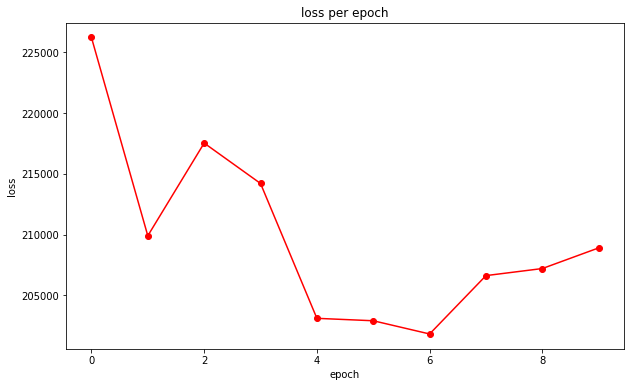

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
#print(loss_values)
plt.plot(loss_values,'-ro')
plt.title("loss per epoch")
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'accuracy')

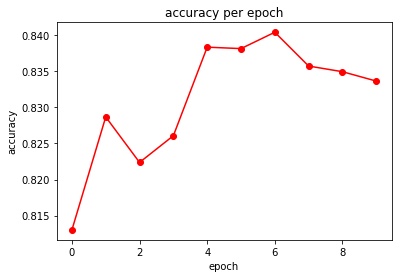

In [17]:
plt.plot(accuracies,'-ro')
plt.title("accuracy per epoch")
plt.xlabel("epoch")
plt.ylabel("accuracy")

#### Options to improve the model:
- Regularization of Neural Networks using DropConnect
- Multi-column Deep Neural Networks for Image Classification
- APAC: Augmented Pattern Classification with Neural Networks
- Simple Deep Neural Network with Dropout

<div id='part2'/>
## 2nd part: Deep Learning applied on MNIST

In [18]:
width = 28 # width of the image in pixels 
height = 28 # height of the image in pixels
flat = width * height # number of pixels in one image 
class_output = 10 # number of possible classifications for the problem

In [19]:
x_image_train = tf.reshape(x_train, [-1,28,28,1])  
x_image_train = tf.cast(x_image_train, 'float32') 

x_image_test = tf.reshape(x_test, [-1,28,28,1]) 
x_image_test = tf.cast(x_image_test, 'float32') 

#creating new dataset with reshaped inputs
train_ds2 = tf.data.Dataset.from_tensor_slices((x_image_train, y_train)).batch(50)
test_ds2 = tf.data.Dataset.from_tensor_slices((x_image_test, y_test)).batch(50)

In [20]:
x_image_train = tf.slice(x_image_train,[0,0,0,0],[10000, 28, 28, 1])
y_train = tf.slice(y_train,[0,0],[10000, 10])

### Convolutional Layer 1

In [21]:
W_conv1 = tf.Variable(tf.random.truncated_normal([5, 5, 1, 32], stddev=0.1, seed=0))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32])) # need 32 biases for 32 outputs

In [22]:
def convolve1(x):
    return(
        tf.nn.conv2d(x, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1)

In [23]:
def h_conv1(x): return(tf.nn.relu(convolve1(x)))

In [24]:
def conv1(x):
    return tf.nn.max_pool(h_conv1(x), ksize=[1, 2, 2, 1], 
                          strides=[1, 2, 2, 1], padding='SAME')

### Convolutional Layer 2

In [25]:
W_conv2 = tf.Variable(tf.random.truncated_normal([5, 5, 32, 64], stddev=0.1, seed=1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64])) #need 64 biases for 64 outputs

In [26]:
def convolve2(x): 
    return( 
    tf.nn.conv2d(conv1(x), W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [27]:
def h_conv2(x):  return tf.nn.relu(convolve2(x))

In [28]:
def conv2(x):  
    return(
    tf.nn.max_pool(h_conv2(x), ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME'))

### Fully Connected Layer

In [29]:
def layer2_matrix(x): return tf.reshape(conv2(x), [-1, 7 * 7 * 64])

In [30]:
W_fc1 = tf.Variable(tf.random.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, seed = 2))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024])) # need 1024 biases for 1024 outputs

In [31]:
def fcl(x): return tf.matmul(layer2_matrix(x), W_fc1) + b_fc1

In [32]:
def h_fc1(x): return tf.nn.relu(fcl(x))

In [33]:
keep_prob=0.5
def layer_drop(x): return tf.nn.dropout(h_fc1(x), keep_prob)

### Readout Layer (Softmax Layer)

In [34]:
W_fc2 = tf.Variable(tf.random.truncated_normal([1024, 10], stddev=0.1, seed = 2)) #1024 neurons
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10])) # 10 possibilities for digits [0,1,2,3,4,5,6,7,8,9]

In [35]:
def fc(x): return tf.matmul(layer_drop(x), W_fc2) + b_fc2

In [36]:
def y_CNN(x): return tf.nn.softmax(fc(x))

## Define functions and train the model

In [37]:
def cross_entropy(y_label, y_pred):
    return (-tf.reduce_sum(y_label * tf.math.log(y_pred + 1.e-10)))

In [38]:
optimizer = tf.keras.optimizers.Adam(1e-4)

In [39]:
variables = [W_conv1, b_conv1, W_conv2, b_conv2, 
             W_fc1, b_fc1, W_fc2, b_fc2, ]

def train_step(x, y):
    with tf.GradientTape() as tape:
        current_loss = cross_entropy( y, y_CNN( x ))
        grads = tape.gradient( current_loss , variables )
        optimizer.apply_gradients( zip( grads , variables ) )
        return current_loss.numpy()

In [40]:
correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1), tf.argmax(y_train, axis=1))

In [41]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float32'))

In [42]:
loss_values=[]
accuracies = []
epochs = 1

for i in range(epochs):
    j=0
    # each batch has 50 examples
    for x_train_batch, y_train_batch in train_ds2:
        j+=1
        current_loss = train_step(x_train_batch, y_train_batch)
        if j%50==0: #reporting intermittent batch statistics
            correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
            #  accuracy
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
            print("epoch ", str(i), "batch", str(j), "loss:", str(current_loss),
                     "accuracy", str(accuracy)) 
            
    current_loss = cross_entropy( y_train, y_CNN( x_image_train )).numpy()
    loss_values.append(current_loss)
    correct_prediction = tf.equal(tf.argmax(y_CNN(x_image_train), axis=1),
                                  tf.argmax(y_train, axis=1))
    #  accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
    accuracies.append(accuracy)
    print("end of epoch ", str(i), "loss", str(current_loss), "accuracy", str(accuracy) )  

epoch  0 batch 50 loss: 144.7171 accuracy 0.4
epoch  0 batch 100 loss: 55.266533 accuracy 0.66
epoch  0 batch 150 loss: 26.575191 accuracy 0.72
epoch  0 batch 200 loss: 20.254406 accuracy 0.8
epoch  0 batch 250 loss: 19.72897 accuracy 0.72
epoch  0 batch 300 loss: 28.034903 accuracy 0.84
epoch  0 batch 350 loss: 27.537882 accuracy 0.88
epoch  0 batch 400 loss: 20.73227 accuracy 0.86
epoch  0 batch 450 loss: 23.8391 accuracy 0.84
epoch  0 batch 500 loss: 15.297451 accuracy 0.86
epoch  0 batch 550 loss: 20.655935 accuracy 0.92
epoch  0 batch 600 loss: 20.287453 accuracy 0.9
epoch  0 batch 650 loss: 16.511066 accuracy 0.9
epoch  0 batch 700 loss: 13.950555 accuracy 0.96
epoch  0 batch 750 loss: 31.556297 accuracy 0.88
epoch  0 batch 800 loss: 12.118884 accuracy 0.92
epoch  0 batch 850 loss: 18.80041 accuracy 0.9
epoch  0 batch 900 loss: 4.7833366 accuracy 0.94
epoch  0 batch 950 loss: 15.706422 accuracy 0.9
epoch  0 batch 1000 loss: 19.231707 accuracy 0.9
epoch  0 batch 1050 loss: 8.02119

In [43]:
j=0
acccuracies=[]
# evaluate accuracy by batch and average...reporting every 100th batch
for x_train_batch, y_train_batch in train_ds2:
        j+=1
        correct_prediction = tf.equal(tf.argmax(y_CNN(x_train_batch), axis=1),
                                  tf.argmax(y_train_batch, axis=1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)).numpy()
        #accuracies.append(accuracy)
        if j%100==0:
            print("batch", str(j), "accuracy", str(accuracy) ) 
import numpy as np
print("accuracy of entire set", str(np.mean(accuracies)))            

batch 100 accuracy 0.96
batch 200 accuracy 0.98
batch 300 accuracy 0.96
batch 400 accuracy 1.0
batch 500 accuracy 0.96
batch 600 accuracy 0.94
batch 700 accuracy 0.96
batch 800 accuracy 0.96
batch 900 accuracy 0.9
batch 1000 accuracy 0.92
batch 1100 accuracy 0.9
batch 1200 accuracy 1.0
accuracy of entire set 0.9389
